## Speed Dating

We have data on an speed dating survey from 2004. It surveyed each participant's perception of other though the lense of 6 triats, or descriptors:

Attractive, Sincere, Intelligent, Fun, Ambitious, and Shared Interests

Before the session, participants were surveyed based on how important these 6 traits were for a perspective partner. They were also asked to rate each date based on the 6 traits after each session. 

Let's inspect our data.

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from collections import Counter
from IPython.core.display import HTML

%matplotlib inline

In [264]:
from subprocess import check_output
dating = pd.read_csv("C:\Code\Data\speeddating.csv", encoding="ISO-8859-1")

print(dating.shape)
display(dating.head())

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


The data has many columns filled with null values. This is because there were many supplimentary survey questions which were not consistently administered, thus they have inconsistent data.

In [106]:
# Total Sample Subsets
#what people rated their dates
tsr = dating[['attr','sinc','intel','fun','amb','shar','gender','dec']].dropna()
tsr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender','Decision']
tsr.Gender[tsr['Gender']==0] = 'Female'
tsr.Gender[tsr['Gender']==1] = 'Male'
#what people want in a partner
tsw = dating[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','gender']].dropna()
tsw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tsw.Gender[tsw['Gender']==0] = 'Female'
tsw.Gender[tsw['Gender']==1] = 'Male'
#What people think others of the same sex want in a partner
tsfw = dating[['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','gender']].dropna()
tsfw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tsfw.Gender[tsfw['Gender']==0] = 'Female'
tsfw.Gender[tsfw['Gender']==1] = 'Male'
#what people think the opposite sex want in a partner
tsmw = dating[['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1','gender']].dropna()
tsmw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tsmw.Gender[tsmw['Gender']==0] = 'Female'
tsmw.Gender[tsmw['Gender']==1] = 'Male'
#What people's dates rated them
tpr = dating[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','gender','dec_o']].dropna()
tpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender','Partner Decision']
tpr.Gender[tpr['Gender']==0] = 'Female'
tpr.Gender[tpr['Gender']==1] = 'Male'
#What people's dates wanted in a partner
tpw = dating[['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','gender']].dropna()
tpw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Gender']
tpw.Gender[tpw['Gender']==0] = 'Female'
tpw.Gender[tpw['Gender']==1] = 'Male'

# Female Only Subsets
#what women rated their dates
fsr = dating_f[['attr','sinc','intel','fun','amb','shar','dec']].dropna()
fsr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Decision']
#what women want in a partner
fsw = dating_f[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].dropna()
fsw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#What women think other women want in a partner
fsfw = dating_f[['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']].dropna()
fsfw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#what women think men want in a partner
fsmw = dating_f[['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].dropna()
fsmw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#What women's dates rated them
fpr = dating_f[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','dec_o']].dropna()
fpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Partner Decision']
#What women's dates wanted in a partner
fpw = dating_f[['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']].dropna()
fpw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']

# Male Only Subsets
#what men rated their dates
msr = dating_m[['attr','sinc','intel','fun','amb','shar','dec']].dropna()
msr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Decision']
#what men want in a partner
msw = dating_m[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].dropna()
msw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#What men think other men want in a partner
msfw = dating_m[['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']].dropna()
msfw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#what men think women want in a partner
msmw = dating_m[['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].dropna()
msmw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']
#what men's dates rated them
mpr = dating_m[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','dec_o']].dropna()
mpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Partner Decision']
#what men's dates wanted in a partner
mpw = dating_m[['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']].dropna()
mpw.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest']

Let's look at how people rated the importance of the 6 traits in a perpective partner.

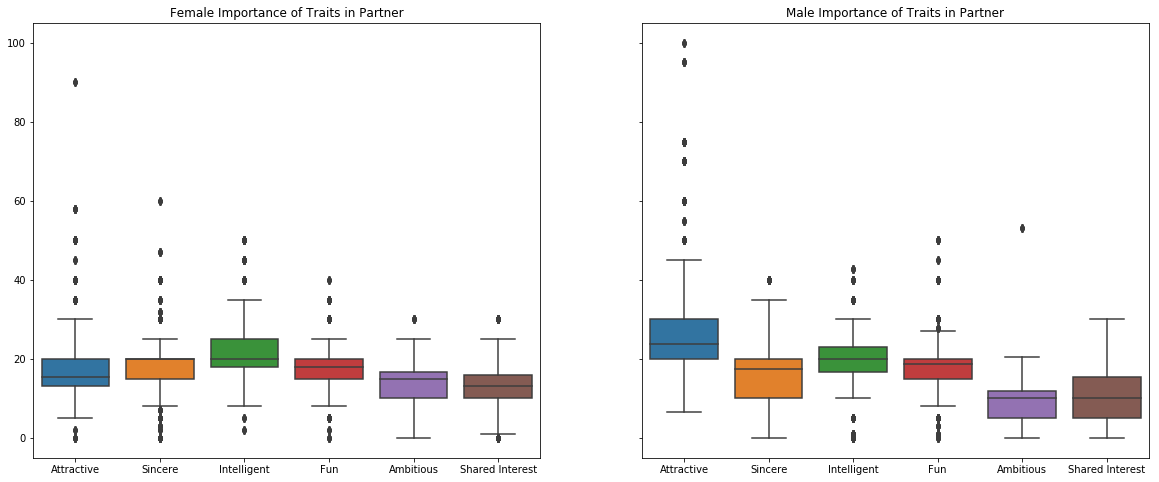

In [112]:
fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsw, ax=ax1)
ax2 = sns.boxplot(data=msw, ax=ax2)
ax1.set_title("Female Importance of Traits in Partner")
ax2.set_title("Male Importance of Traits in Partner")
plt.show()

Generally both sexes rated the importance of traits somewhat differently. 

For women: intelligent > attractive = fun = sincere > ambitious = shared interest
For men: attractive > intelligent > sincere = fun > shared interest > ambitious

So the sexes rate the importance of traits slightly differently, but still mostly the same order. We can also see that the traits are mostly the same.


Now let's look at how participants rated the importance of the 6 traits to others of the same sex.

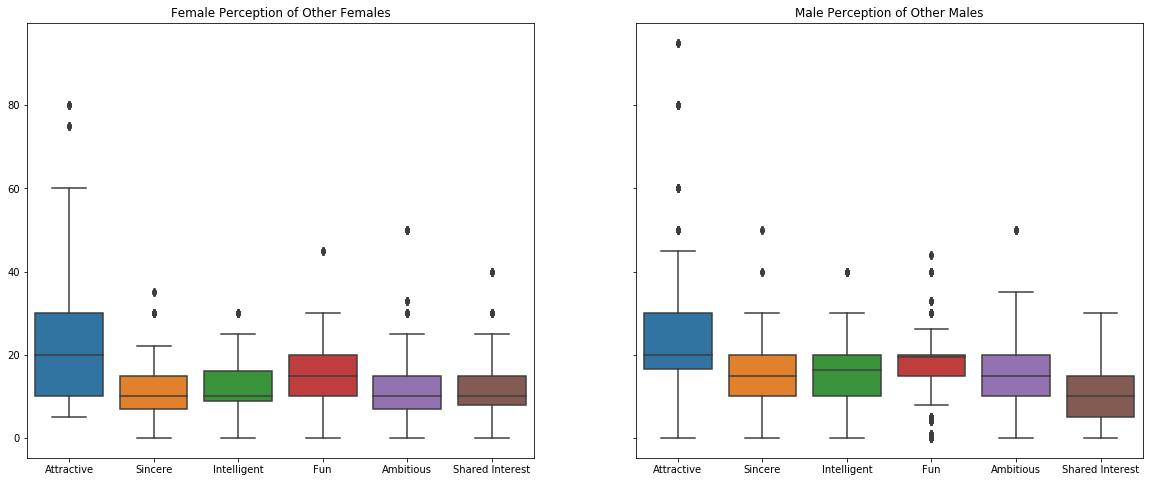

In [111]:
fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsfw, ax=ax1)
ax2 = sns.boxplot(data=msmw, ax=ax2)
ax1.set_title("Female Perception of Other Females")
ax2.set_title("Male Perception of Other Males")
plt.show()

Now let's look at how participants rated the importance of the 6 traits to others of the opposite sex.

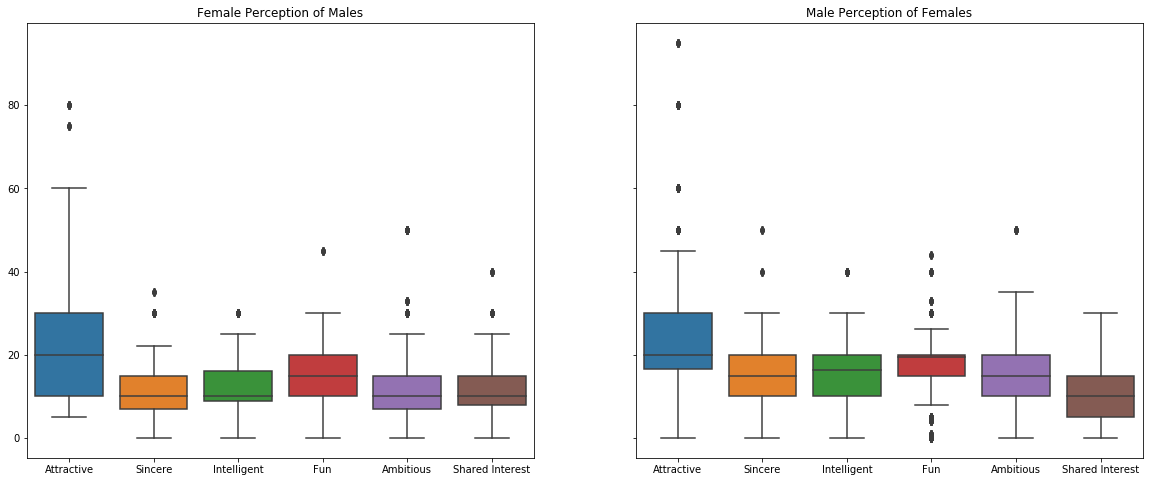

In [115]:
fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsfw, ax=ax1)
ax2 = sns.boxplot(data=msmw, ax=ax2)
ax1.set_title("Female Perception of Males")
ax2.set_title("Male Perception of Females")
plt.show()

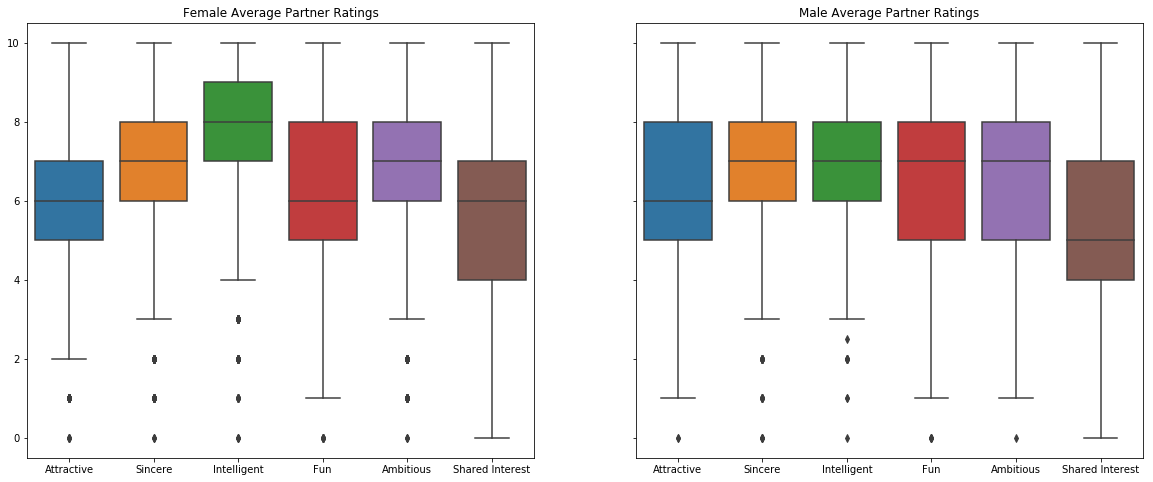

In [114]:
fsr_plot = fsr.drop('Decision', axis=1)
msr_plot = msr.drop('Decision', axis=1)

fig, (ax1,ax2) = plt.subplots(figsize=(20,8), ncols=2,  sharey=True)
ax1 = sns.boxplot(data=fsr_plot, ax=ax1)
ax2 = sns.boxplot(data=msr_plot, ax=ax2)
ax1.set_title("Female Average Partner Ratings")
ax2.set_title("Male Average Partner Ratings")
plt.show()

c:\users\ben stano\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


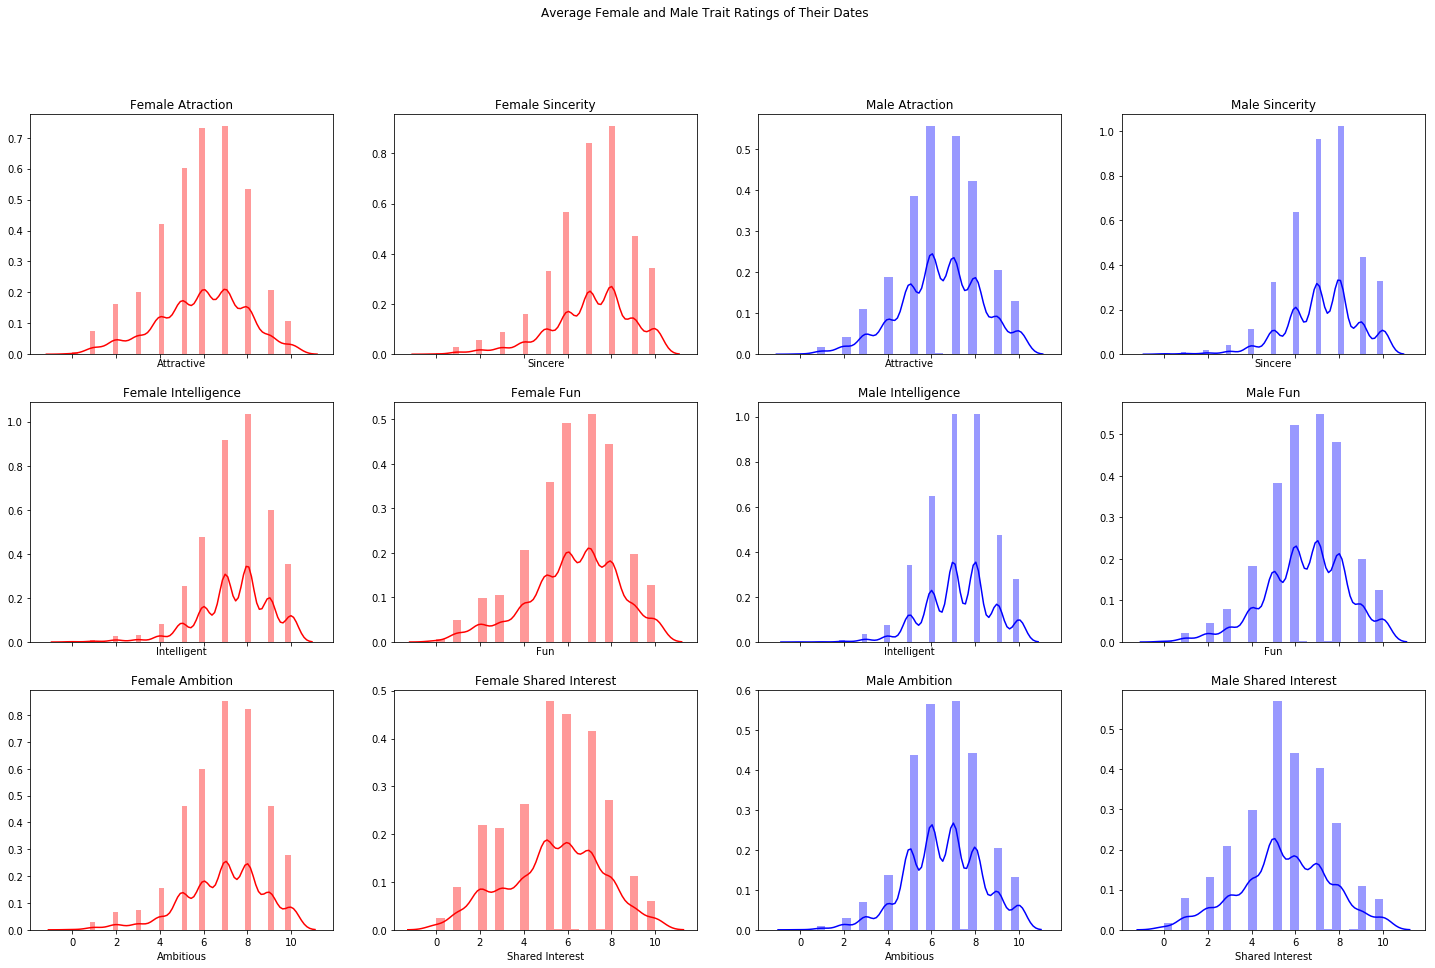

In [194]:
f, axes = plt.subplots(3, 4, figsize=(25,15), sharex=True)
sns.distplot(fsr['Attractive'], color='r', ax=axes[0,0]).set_title('Female Atraction')
sns.distplot(fsr['Sincere'], color='r', ax=axes[0,1]).set_title('Female Sincerity')
sns.distplot(fsr['Intelligent'], color='r', ax=axes[1,0]).set_title('Female Intelligence')
sns.distplot(fsr['Fun'], color='r', ax=axes[1,1]).set_title('Female Fun')
sns.distplot(fsr['Ambitious'], color='r', ax=axes[2,0]).set_title('Female Ambition')
sns.distplot(fsr['Shared Interest'], color='r', ax=axes[2,1]).set_title('Female Shared Interest')
sns.distplot(msr['Attractive'], color='b', ax=axes[0,2]).set_title('Male Atraction')
sns.distplot(msr['Sincere'], color='b', ax=axes[0,3]).set_title('Male Sincerity')
sns.distplot(msr['Intelligent'], color='b', ax=axes[1,2]).set_title('Male Intelligence')
sns.distplot(msr['Fun'], color='b', ax=axes[1,3]).set_title('Male Fun')
sns.distplot(msr['Ambitious'], color='b', ax=axes[2,2]).set_title('Male Ambition')
sns.distplot(msr['Shared Interest'], color='b', ax=axes[2,3]).set_title('Male Shared Interest')
plt.suptitle('Average Female and Male Trait Ratings of Their Dates')
plt.show()


Now let's look at the average rating of a person in any of the 6 traits against the average that the person rating them wants to meet for a second date and see if there is any correlation.

In [191]:
atpr = dating.groupby('iid')['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','dec_o'].mean()
atpr.columns = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interest','Decision']

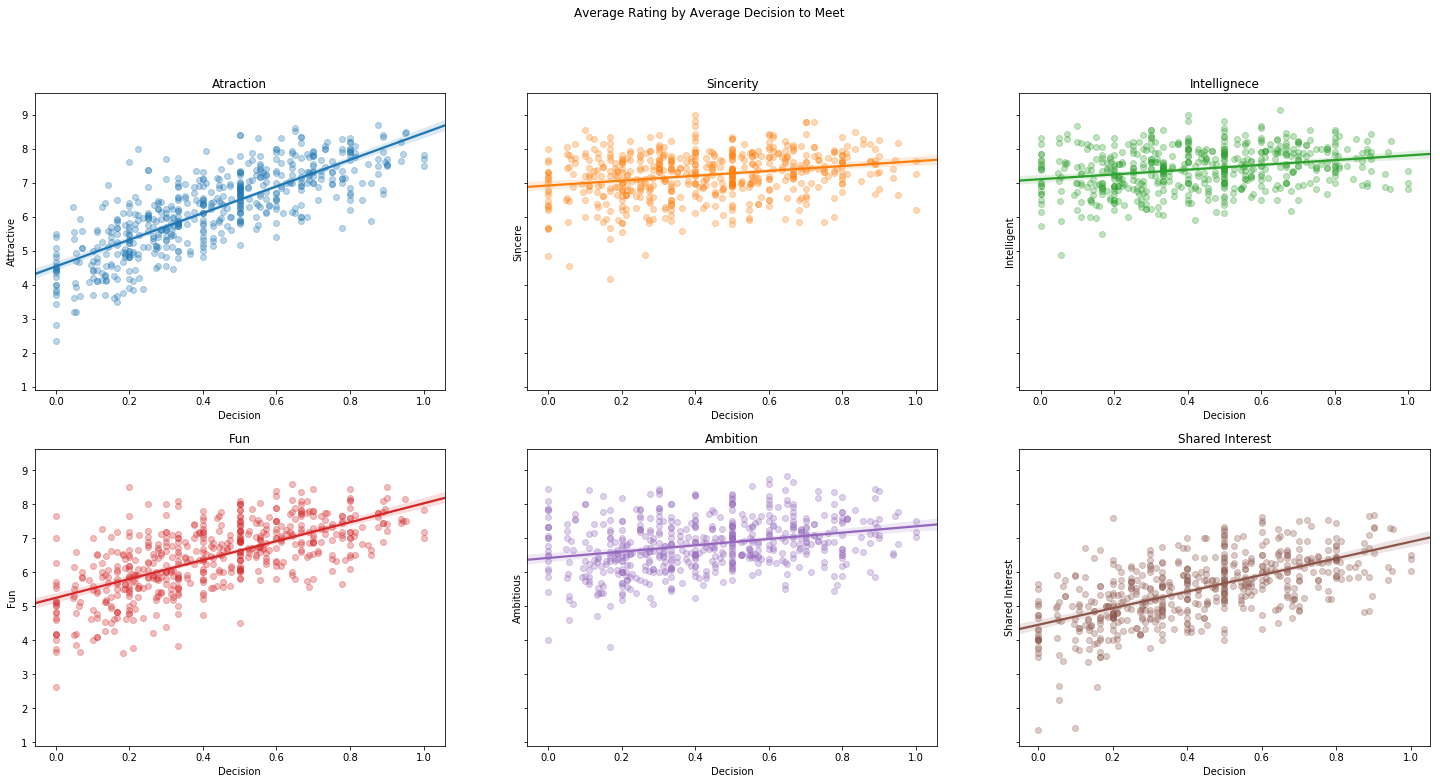

In [198]:
fig, axes = plt.subplots(2,3, figsize=(25,12), sharey=True)
sns.regplot(x=atpr['Decision'], y=atpr['Attractive'], scatter_kws={'alpha':0.3}, ax=axes[0,0]).set_title('Atraction')
sns.regplot(x=atpr['Decision'], y=atpr['Sincere'], scatter_kws={'alpha':0.3}, ax=axes[0,1]).set_title('Sincerity')
sns.regplot(x=atpr['Decision'], y=atpr['Intelligent'], scatter_kws={'alpha':0.3}, ax=axes[0,2]).set_title('Intellignece')
sns.regplot(x=atpr['Decision'], y=atpr['Fun'], scatter_kws={'alpha':0.3}, ax=axes[1,0]).set_title('Fun')
sns.regplot(x=atpr['Decision'], y=atpr['Ambitious'], scatter_kws={'alpha':0.3}, ax=axes[1,1]).set_title('Ambition')
sns.regplot(x=atpr['Decision'], y=atpr['Shared Interest'], scatter_kws={'alpha':0.3}, ax=axes[1,2]).set_title('Shared Interest')
plt.suptitle('Average Rating by Average Decision to Meet')
plt.show()

We can see that being rated more attractive makes one much more likely to be asked to meet again. After that, a higher rating of fun and having shared interested also seems to make someone slightly more likely to be asked to meet again. Sincerity, Intelligence, and Ambition seem to have much less impact in the likelyhood to be asked to meet again.

We can look at the exact correlation coefficient as an exact measure of each traits influence.

In [255]:
att_r = np.corrcoef(atpr['Decision'], atpr['Attractive'])[0, 1]
sin_r = np.corrcoef(atpr['Decision'], atpr['Sincere'])[0, 1]
int_r = np.corrcoef(atpr['Decision'], atpr['Intelligent'])[0, 1]
fun_r = np.corrcoef(atpr['Decision'], atpr['Fun'])[0, 1]
amb_r = np.corrcoef(atpr['Decision'], atpr['Ambitious'])[0, 1]
sha_r = np.corrcoef(atpr['Decision'], atpr['Shared Interest'])[0, 1]
print('Correlation between meeting again and trait ratings:\nAttractive: {}'.format(round(att_r,2)))
print('Sincere: {}'.format(round(sin_r,2)))
print('Intelligent: {}'.format(round(int_r,2)))
print('Fun: {}'.format(round(fun_r,2)))
print('Ambitious: {}'.format(round(amb_r,2)))
print('Shared Interest: {}'.format(round(sha_r,2)))

Correlation between meeting again and trait ratings:
Attractive: 0.79
Sincere: 0.25
Intelligent: 0.27
Fun: 0.66
Ambitious: 0.29
Shared Interest: 0.62


So attractiveness defintely seems to be most important, then fun, shared interests, and ambition, intelligence, and sincerity seem to have little impact.

This is interesting, as intelligence was ranked first and second most important by women and men respectively, but it doesn't seem to be that important. Also, shared interest was last and second to last for women and men respectively, but it seems to have a weak but noticeable affect on the likelyhood to be asked again. 

Even though people say they wanted intelligence, it isn't what they focus on. Can we change how much intelligence rating affects the decision to meet for a second date? 

## Hypothesis

I believe that if we influence the setting where the speed dating is taking place, we can change the amount of influence any particular trait has on the final decision to meet for a second date. We will test for this to see if we can make intelligence a more influencial triat by changing the area the speed dating resturant to something themed around the celebration of intellect, like a library. 

If we host speed dating sessions in an library themed area, we will see an increase in the positive influence of the date's intelligence on the decision to meet for a second date.

## Rollout Plan

We will get subjects to participate in a speed dating experiment and do our best to split them into groups of equal demographics. One group will be the control and the other will be the test.

We will rent out a conference center or something else where we can have 2 large, but seperate area to house the 2 different groups. One room will be the control room, and the other will be the library themed room. Both rooms will have similar seating arrangements and furniture, but the library themed room will contain bookshelves filled with both classic novels and modern masterpeices and classic art.

From there, we will have our participants fill out a similar survey as they did in the previous data set.

c:\users\ben stano\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


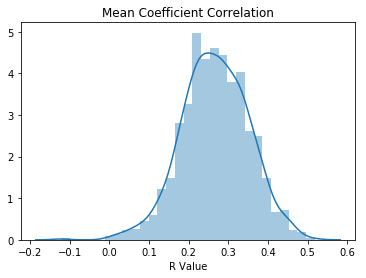

In [260]:
sample_r = []
for i in range(1000):
    sam = atpr.sample(100,replace=False)
    r = np.corrcoef(sam['Decision'], sam['Intelligent'])[0, 1]
    sample_r.append(r)

g = sns.distplot(sample_r)
g.set_title("Mean Coefficient Correlation")
g.set_xlabel("R Value")
plt.show()

## Evaluation Plan

#### Confidence level = 0.90 
#### P-Value = 0.10

We will see if there is a difference in the correlation coefficient value, r, between the intellignece rating and the decision to go on a second date. We can create composite samples of each groups data as we have done with the earlier data. We will use the standard confidence level of 90% because our data it will be somewhat unreliable, as it relies on self-reported data.